In [ ]:
#importation of the libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import keras
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.getcwd()

'/content'

In [ ]:
#data for the training
df1 = pd.read_csv("/content/drive/MyDrive/Group_Assignment/diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
#data for the testing
df2 = pd.read_csv("/content/drive/MyDrive/Group_Assignment/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [ ]:
#random 10 observations in the data
df1.sample(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
49528               0.0     1.0       0.0        1.0  20.0     0.0     0.0   
102393              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
175766              0.0     1.0       0.0        1.0  34.0     0.0     0.0   
23258               0.0     1.0       1.0        1.0  32.0     0.0     0.0   
29642               0.0     1.0       0.0        1.0  46.0     0.0     0.0   
247786              0.0     1.0       1.0        1.0  26.0     0.0     0.0   
162457              0.0     0.0       0.0        1.0  34.0     0.0     0.0   
146922              0.0     0.0       0.0        1.0  29.0     1.0     0.0   
104300              0.0     0.0       0.0        1.0  34.0     1.0     0.0   
17726               0.0     0.0       0.0        1.0  22.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
49528                    0.0           0.0     1.0  ...            1.0   
102393                   0.0           0.0     0.0  ...            1.0   
175766                   0.0           0.0     1.0  ...            1.0   
23258                    0.0           1.0     1.0  ...            1.0   
29642                    0.0           1.0     1.0  ...            1.0   
247786                   1.0           1.0     1.0  ...            1.0   
162457                   0.0           0.0     0.0  ...            1.0   
146922                   0.0           1.0     1.0  ...            1.0   
104300                   0.0           1.0     1.0  ...            1.0   
17726                    0.0           0.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
49528           0.0      3.0       0.0       0.0       0.0  0.0  13.0   
102393          0.0      2.0       0.0      21.0       0.0  0.0  10.0   
175766          0.0      2.0       0.0       0.0       0.0  0.0  10.0   
23258           0.0      1.0       0.0       1.0       0.0  1.0   6.0   
29642           0.0      1.0       0.0       0.0       0.0  0.0   4.0   
247786          0.0      2.0       0.0       0.0       0.0  0.0  13.0   
162457          0.0      3.0       2.0       0.0       0.0  1.0   1.0   
146922          1.0      3.0       7.0      30.0       1.0  1.0   8.0   
104300          0.0      1.0       0.0       0.0       0.0  1.0  10.0   
17726           0.0      2.0       0.0       0.0       0.0  0.0   3.0   

        Education  Income  
49528         4.0     5.0  
102393        4.0     6.0  
175766        4.0     6.0  
23258         6.0     8.0  
29642         3.0     2.0  
247786        5.0     4.0  
162457        5.0     1.0  
146922        4.0     3.0  
104300        6.0     8.0  
17726         6.0     8.0  

[10 rows x 22 columns]

In [ ]:
#random 10 observations in the test data
df2.sample(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
11588              0.0     0.0       1.0        1.0  37.0     1.0     0.0   
36710              1.0     0.0       1.0        1.0  23.0     1.0     0.0   
17813              0.0     1.0       0.0        1.0  30.0     0.0     0.0   
61873              1.0     1.0       1.0        1.0  31.0     0.0     0.0   
46234              1.0     1.0       1.0        1.0  61.0     1.0     0.0   
35346              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
23680              0.0     0.0       0.0        1.0  41.0     0.0     0.0   
55113              1.0     1.0       1.0        1.0  28.0     0.0     0.0   
62487              1.0     1.0       1.0        1.0  34.0     1.0     0.0   
29640              0.0     0.0       0.0        1.0  23.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
11588                   0.0           0.0     1.0  ...            1.0   
36710                   0.0           1.0     1.0  ...            1.0   
17813                   1.0           1.0     1.0  ...            1.0   
61873                   0.0           1.0     0.0  ...            1.0   
46234                   0.0           0.0     1.0  ...            1.0   
35346                   1.0           0.0     1.0  ...            1.0   
23680                   0.0           1.0     0.0  ...            1.0   
55113                   0.0           1.0     0.0  ...            1.0   
62487                   0.0           1.0     0.0  ...            1.0   
29640                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
11588          0.0      5.0      30.0      15.0       1.0  0.0   4.0   
36710          0.0      3.0      10.0      15.0       1.0  1.0  13.0   
17813          0.0      3.0       0.0       0.0       0.0  0.0  13.0   
61873          0.0      3.0       0.0       0.0       0.0  1.0  12.0   
46234          0.0      4.0       0.0      30.0       1.0  1.0   8.0   
35346          0.0      5.0      30.0      30.0       1.0  0.0   9.0   
23680          0.0      2.0       2.0       1.0       0.0  1.0   5.0   
55113          0.0      4.0       0.0       0.0       0.0  1.0  10.0   
62487          0.0      3.0       0.0       0.0       0.0  1.0  10.0   
29640          0.0      2.0       0.0       0.0       0.0  1.0   5.0   

       Education  Income  
11588        5.0     1.0  
36710        6.0     8.0  
17813        5.0     2.0  
61873        2.0     3.0  
46234        5.0     3.0  
35346        5.0     1.0  
23680        6.0     8.0  
55113        5.0     5.0  
62487        5.0     6.0  
29640        6.0     8.0  

[10 rows x 22 columns]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df1.shape, df2.shape

((253680, 22), (70692, 22))

The training data has 253680 observations and 21 features while the testing data has 70692 observations with 21 features.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## One-hot encoding in training set.

In [ ]:
# importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder


In [ ]:
#nEW DATA Set without BMI
new_df1 = df1.drop(['BMI'],axis=1)
new_df1.shape

(253680, 21)

In [ ]:
# unique values in each columns
for x in new_df1.columns:
    #printing unique values
    print(x ,':', len(new_df1[x].unique()))

Diabetes_binary : 2
HighBP : 2
HighChol : 2
CholCheck : 2
Smoker : 2
Stroke : 2
HeartDiseaseorAttack : 2
PhysActivity : 2
Fruits : 2
Veggies : 2
HvyAlcoholConsump : 2
AnyHealthcare : 2
NoDocbcCost : 2
GenHlth : 5
MentHlth : 31
PhysHlth : 31
DiffWalk : 2
Sex : 2
Age : 13
Education : 6
Income : 8


In [ ]:
df1[['HighBP',"HighChol",'CholCheck','Smoker','Stroke',
     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
     'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
   'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']] = df1[['HighBP',"HighChol",'CholCheck','Smoker','Stroke',
     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
     'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
    'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']].astype('object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  object 
 2   HighChol              253680 non-null  object 
 3   CholCheck             253680 non-null  object 
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  object 
 6   Stroke                253680 non-null  object 
 7   HeartDiseaseorAttack  253680 non-null  object 
 8   PhysActivity          253680 non-null  object 
 9   Fruits                253680 non-null  object 
 10  Veggies               253680 non-null  object 
 11  HvyAlcoholConsump     253680 non-null  object 
 12  AnyHealthcare         253680 non-null  object 
 13  NoDocbcCost           253680 non-null  object 
 14  GenHlth               253680 non-null  object 
 15  

In [ ]:
new_df1 = df1.drop(['BMI'],axis=1)
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Diabetes_binary       253680 non-null  object
 1   HighBP                253680 non-null  object
 2   HighChol              253680 non-null  object
 3   CholCheck             253680 non-null  object
 4   Smoker                253680 non-null  object
 5   Stroke                253680 non-null  object
 6   HeartDiseaseorAttack  253680 non-null  object
 7   PhysActivity          253680 non-null  object
 8   Fruits                253680 non-null  object
 9   Veggies               253680 non-null  object
 10  HvyAlcoholConsump     253680 non-null  object
 11  AnyHealthcare         253680 non-null  object
 12  NoDocbcCost           253680 non-null  object
 13  GenHlth               253680 non-null  object
 14  MentHlth              253680 non-null  object
 15  PhysHlth         

In [ ]:
cat_cols =['HighBP',"HighChol",'CholCheck','Smoker','Stroke',
     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
     'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
   'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']

In [ ]:
#onehotencoder = OneHotEncoder(sparse_output=False, categories='auto')

#transformed_data = onehotencoder.fit_transform(df1[cat_cols])

# the above transformed_data is an array so convert it to dataframe
#encoded_data = pd.DataFrame(transformed_data, index=df1.index)

# now concatenate the original data and the encoded data using pandas
#concatenated_data = pd.concat([df1, encoded_data], axis=1)

In [ ]:
#concatenated_data.head()

In [ ]:
df1_ohe = df1
for col in cat_cols:
    col_ohe = pd.get_dummies(df1[col], prefix=col)
    df1_ohe = pd.concat((df1_ohe, col_ohe), axis=1).drop(col, axis=1)
df1_ohe.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/l

Diabetes_binary   BMI  HighBP_0.0  HighBP_1.0  HighChol_0.0  HighChol_1.0  \
0              0.0  40.0           0           1             0             1   
1              0.0  25.0           1           0             1             0   
2              0.0  28.0           0           1             0             1   
3              0.0  27.0           0           1             1             0   
4              0.0  24.0           0           1             0             1   

   CholCheck_0.0  CholCheck_1.0  Smoker_0.0  Smoker_1.0  ...  Education_5.0  \
0              0              1           0           1  ...              0   
1              1              0           0           1  ...              0   
2              0              1           1           0  ...              0   
3              0              1           1           0  ...              0   
4              0              1           1           0  ...              1   

   Education_6.0  Income_1.0  Income_2.0  Income_3.0  Income_4.0  Income_5.0  \
0              0           0           0           1           0           0   
1              1           1           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           1           0   

   Income_6.0  Income_7.0  Income_8.0  
0           0           0           0  
1           0           0           0  
2           0           0           1  
3           1           0           0  
4           0           0           0  

[5 rows x 124 columns]

In [ ]:
df1_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Columns: 124 entries, Diabetes_binary to Income_8.0
dtypes: float64(2), uint8(122)
memory usage: 33.4 MB


In [ ]:
#check for missing values
df1_ohe.isna().sum()

Diabetes_binary    0
BMI                0
HighBP_0.0         0
HighBP_1.0         0
HighChol_0.0       0
                  ..
Income_4.0         0
Income_5.0         0
Income_6.0         0
Income_7.0         0
Income_8.0         0
Length: 124, dtype: int64

There is no missing values in the training data.

In [ ]:
df2.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There is no missing values in the test data.

In [ ]:
df1_ohe.describe()

Diabetes_binary            BMI     HighBP_0.0     HighBP_1.0  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333      28.382364       0.570999       0.429001   
std           0.346294       6.608694       0.494934       0.494934   
min           0.000000      12.000000       0.000000       0.000000   
25%           0.000000      24.000000       0.000000       0.000000   
50%           0.000000      27.000000       1.000000       0.000000   
75%           0.000000      31.000000       1.000000       1.000000   
max           1.000000      98.000000       1.000000       1.000000   

        HighChol_0.0   HighChol_1.0  CholCheck_0.0  CholCheck_1.0  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.575879       0.424121       0.037330       0.962670   
std         0.494210       0.494210       0.189571       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         1.000000       0.000000       0.000000       1.000000   
75%         1.000000       1.000000       0.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Smoker_0.0     Smoker_1.0  ...  Education_5.0  Education_6.0  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.556831       0.443169  ...       0.275583       0.423072   
std         0.496761       0.496761  ...       0.446809       0.494048   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         1.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       1.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

          Income_1.0     Income_2.0     Income_3.0     Income_4.0  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.038675       0.046448       0.063048       0.079372   
std         0.192819       0.210454       0.243050       0.270318   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Income_5.0     Income_6.0     Income_7.0     Income_8.0  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.102030       0.143764       0.170368       0.356295  
std         0.302689       0.350851       0.375957       0.478905  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       1.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 124 columns]

## Correlation matrix of numerical variables

In [ ]:
corr = df1_ohe.corr()
plt.figure(figsize = (50, 50))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [ ]:
print(df1_ohe['Diabetes_binary'].value_counts(ascending=True))

1.0     35346
0.0    218334
Name: Diabetes_binary, dtype: int64


In [ ]:
print(df1_ohe['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))

1.0    13.933302%
0.0    86.066698%
Name: Diabetes_binary, dtype: object


## Boxplot of BMI Vs Diabetes status

<Axes: xlabel='Diabetes_binary', ylabel='BMI'>

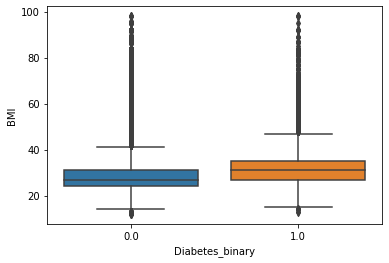

In [ ]:
sns.boxplot(data=df1_ohe,x="Diabetes_binary",y="BMI")

## Distribution of diabet status in the training set.

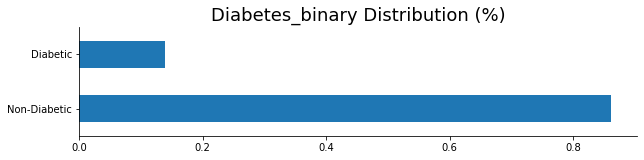

In [ ]:

df1_ohe['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

The training set is hugely unbalanced with roughly $14 \% $ of observations belonging to diabetic patients and $86 \% $ of non-diabetic patient.

In [ ]:
#df1['Diabetes_binary'].plot.bar()
#plt.title("Barplot of distribution of diabet status of patient in the training data")
#plt.xlabel("Diabet status")
#plt.ylabel("Number of observations")

In [ ]:
print(df2['Diabetes_binary'].value_counts(ascending=True))

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64


In [ ]:
print(df2['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))

0.0    50.000000%
1.0    50.000000%
Name: Diabetes_binary, dtype: object


## Distribution of Diabet status in the test set.

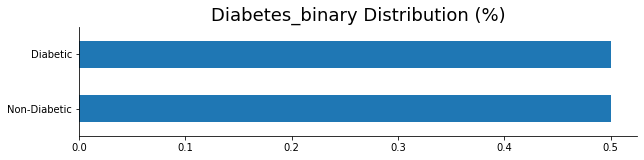

In [ ]:
df2['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

Training our model on unbalanced data set and then testing it later on a balanced data set will create a huge bias because it will be more likely to predict that the patient is non-diabetic rather than he/she is diabetic. So we think that to reduce that bias we have to create unbalancedness on the testing data too by keeping just $14 \%$ of the observations corresponding to diabetic patients.

In [ ]:
print(df1['Sex'].value_counts(ascending=True))

1.0    111706
0.0    141974
Name: Sex, dtype: int64


## Plot of different variables according to the diabet status.

In [ ]:
colors = ['#be4d25','#2596be']
def analyse_cat(var):
    (df1.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh',stacked=True,figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"],bbox_to_anchor=(1, 1, 0, 0),shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

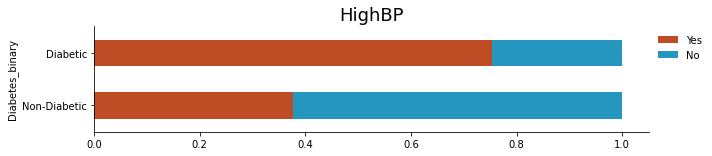

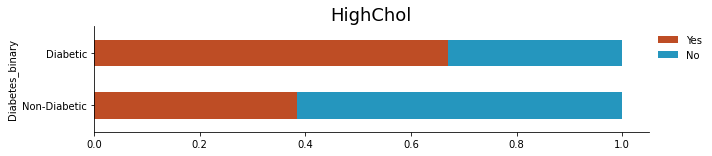

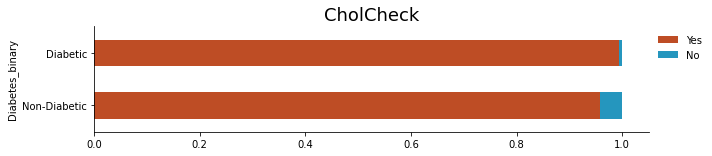

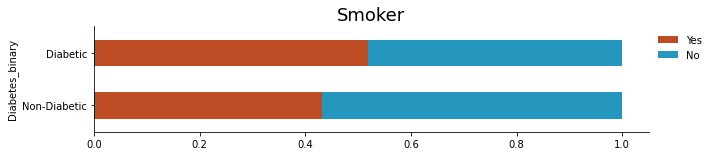

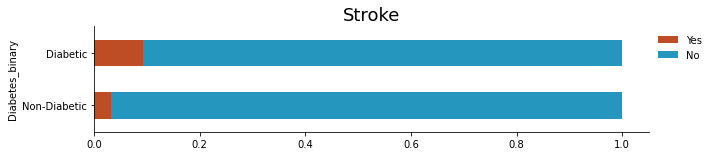

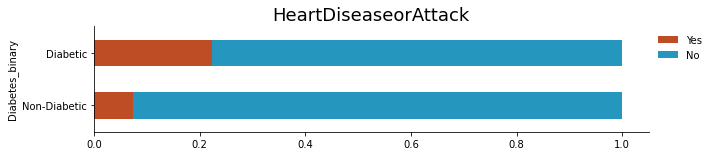

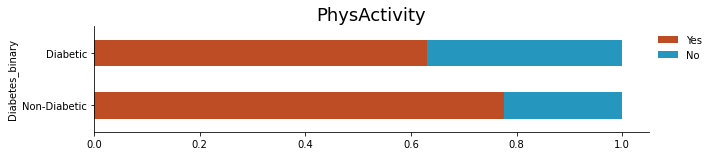

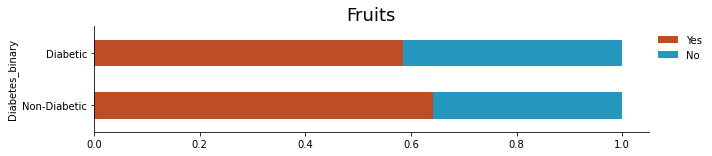

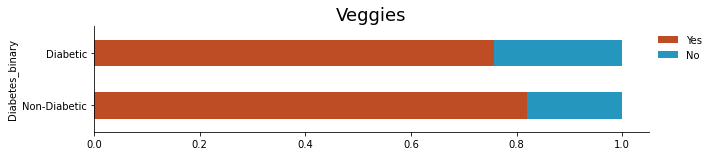

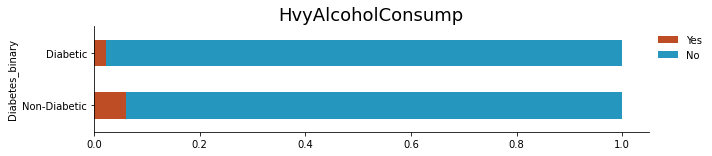

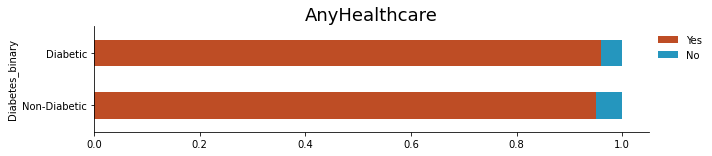

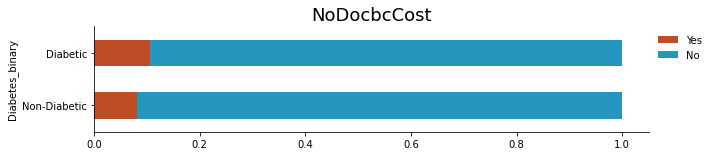

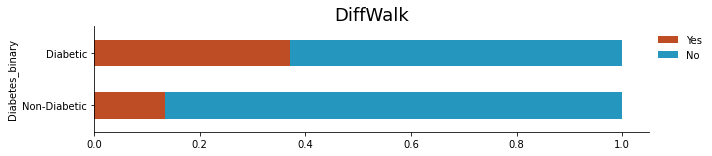

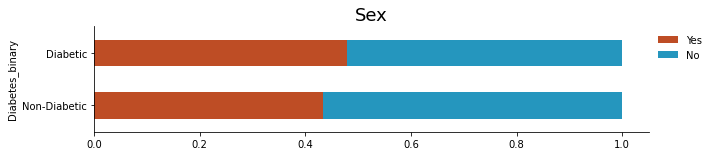

In [ ]:
bool_vars = (df1.nunique()[df1.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
for var in bool_vars:
    analyse_cat(var)

In [ ]:
print(df2['Sex'].value_counts(ascending=True))

1.0    32306
0.0    38386
Name: Sex, dtype: int64


The variable gender is kind of unbalanced, so it is good for our analyis . Both gender were well represented.

##Starting the process of unbalancing test set

In [ ]:
#We extract the data on the test set corresponding to status 1.
df3 = df2[df2['Diabetes_binary']==1.0]

In [ ]:
df3.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
35346              1.0     1.0       1.0        1.0  30.0     1.0     0.0   
35347              1.0     0.0       0.0        1.0  25.0     1.0     0.0   
35348              1.0     1.0       1.0        1.0  28.0     0.0     0.0   
35349              1.0     0.0       0.0        1.0  23.0     1.0     0.0   
35350              1.0     1.0       0.0        1.0  27.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
35346                   1.0           0.0     1.0  ...            1.0   
35347                   0.0           1.0     1.0  ...            1.0   
35348                   0.0           0.0     0.0  ...            1.0   
35349                   0.0           1.0     0.0  ...            1.0   
35350                   0.0           1.0     1.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
35346          0.0      5.0      30.0      30.0       1.0  0.0   9.0   
35347          0.0      3.0       0.0       0.0       0.0  1.0  13.0   
35348          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
35349          0.0      2.0       0.0       0.0       0.0  1.0   7.0   
35350          0.0      1.0       0.0       0.0       0.0  0.0  13.0   

       Education  Income  
35346        5.0     1.0  
35347        6.0     8.0  
35348        4.0     6.0  
35349        5.0     6.0  
35350        5.0     4.0  

[5 rows x 22 columns]

In [ ]:
df3.shape #shape

(35346, 22)

Now we have to consider $14 \%$ of that pat of the testing data.

In [ ]:
#Sample of the testing data corresponding to the category 1, diabetic.
df4 = df3.sample(frac =.17)
df4.shape

(6009, 22)

In [ ]:
#Part of the data set with just category 0
df5 = df2[df2['Diabetes_binary']==0.0]
df5.shape

(35346, 22)

In [ ]:
#Now we have to merge both data set
df_test = pd.concat([df5, df4])
df_test.shape

(41355, 22)

In [ ]:
print(df_test['Diabetes_binary'].value_counts(ascending=True))

1.0     6009
0.0    35346
Name: Diabetes_binary, dtype: int64


In [ ]:
print(df_test['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))

1.0    14.530287%
0.0    85.469713%
Name: Diabetes_binary, dtype: object


In [ ]:
df_test.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       0.0        1.0  26.0     0.0     0.0   
1              0.0     1.0       1.0        1.0  26.0     1.0     1.0   
2              0.0     0.0       0.0        1.0  26.0     0.0     0.0   
3              0.0     1.0       1.0        1.0  28.0     1.0     0.0   
4              0.0     0.0       0.0        1.0  29.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           1.0     0.0  ...            1.0   
1                   0.0           0.0     1.0  ...            1.0   
2                   0.0           1.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      3.0       5.0      30.0       0.0  1.0   4.0        6.0   
1          0.0      3.0       0.0       0.0       0.0  1.0  12.0        6.0   
2          0.0      1.0       0.0      10.0       0.0  1.0  13.0        6.0   
3          0.0      3.0       0.0       3.0       0.0  1.0  11.0        6.0   
4          0.0      2.0       0.0       0.0       0.0  0.0   8.0        5.0   

   Income  
0     8.0  
1     8.0  
2     8.0  
3     8.0  
4     8.0  

[5 rows x 22 columns]

In [ ]:
df_test_shuffled = df_test.sample(frac = 1)
df_test_shuffled.sample(10)

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
19658              0.0     0.0       0.0        1.0  25.0     0.0     0.0   
32615              0.0     0.0       0.0        1.0  23.0     0.0     0.0   
23187              0.0     1.0       1.0        0.0  27.0     0.0     0.0   
34186              0.0     0.0       1.0        1.0  18.0     0.0     0.0   
27235              0.0     0.0       0.0        1.0  23.0     0.0     0.0   
16823              0.0     1.0       0.0        1.0  24.0     1.0     0.0   
24233              0.0     0.0       0.0        1.0  22.0     1.0     1.0   
223                0.0     1.0       0.0        1.0  25.0     0.0     0.0   
3985               0.0     0.0       0.0        1.0  24.0     1.0     0.0   
34740              0.0     0.0       0.0        1.0  37.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
19658                   0.0           1.0     0.0  ...            1.0   
32615                   0.0           1.0     1.0  ...            1.0   
23187                   0.0           0.0     1.0  ...            0.0   
34186                   0.0           0.0     1.0  ...            1.0   
27235                   0.0           1.0     1.0  ...            0.0   
16823                   0.0           1.0     0.0  ...            0.0   
24233                   0.0           1.0     1.0  ...            1.0   
223                     0.0           1.0     1.0  ...            1.0   
3985                    0.0           1.0     1.0  ...            1.0   
34740                   0.0           0.0     0.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
19658          0.0      1.0       0.0       0.0       0.0  1.0   9.0   
32615          0.0      1.0       0.0       0.0       0.0  0.0  10.0   
23187          0.0      3.0       0.0       0.0       0.0  1.0   9.0   
34186          0.0      3.0       0.0       0.0       0.0  0.0   9.0   
27235          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
16823          1.0      3.0      30.0      15.0       0.0  0.0   3.0   
24233          1.0      5.0      15.0      30.0       0.0  0.0   8.0   
223            0.0      2.0       2.0       0.0       0.0  1.0   8.0   
3985           0.0      1.0       0.0       0.0       0.0  0.0   4.0   
34740          0.0      4.0       7.0      30.0       1.0  1.0   7.0   

       Education  Income  
19658        6.0     8.0  
32615        6.0     2.0  
23187        2.0     6.0  
34186        4.0     7.0  
27235        4.0     8.0  
16823        4.0     5.0  
24233        6.0     5.0  
223          6.0     8.0  
3985         5.0     7.0  
34740        4.0     4.0  

[10 rows x 22 columns]

In [ ]:
df_test_shuffled[['HighBP',"HighChol",'CholCheck','Smoker','Stroke',
     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
     'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
   'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']] = df_test_shuffled[['HighBP',"HighChol",'CholCheck','Smoker','Stroke',
     'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies',
     'HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth',
    'MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']].astype('object')

In [ ]:
#one -hot encoding of the test set
df2_ohe = df_test_shuffled
for col in cat_cols:
    col_ohe = pd.get_dummies(df_test_shuffled[col], prefix=col)
    df2_ohe = pd.concat((df2_ohe, col_ohe), axis=1).drop(col, axis=1)
df2_ohe.head()

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/usr/local/l

Diabetes_binary   BMI  HighBP_0.0  HighBP_1.0  HighChol_0.0  \
19731              0.0  21.0           1           0             1   
48236              1.0  30.0           0           1             0   
6610               0.0  28.0           1           0             1   
33735              0.0  25.0           1           0             1   
67641              1.0  28.0           1           0             1   

       HighChol_1.0  CholCheck_0.0  CholCheck_1.0  Smoker_0.0  Smoker_1.0  \
19731             0              0              1           1           0   
48236             1              0              1           0           1   
6610              0              0              1           1           0   
33735             0              0              1           1           0   
67641             0              1              0           0           1   

       ...  Education_5.0  Education_6.0  Income_1.0  Income_2.0  Income_3.0  \
19731  ...              0              1           0           0           0   
48236  ...              1              0           0           0           0   
6610   ...              0              1           0           0           0   
33735  ...              0              1           0           0           0   
67641  ...              1              0           1           0           0   

       Income_4.0  Income_5.0  Income_6.0  Income_7.0  Income_8.0  
19731           0           0           0           0           1  
48236           1           0           0           0           0  
6610            0           0           0           1           0  
33735           0           0           0           1           0  
67641           0           0           0           0           0  

[5 rows x 124 columns]

In [ ]:
df2_ohe.shape

(41355, 124)

## Distribution of diabetic status in the unbalanced test set.

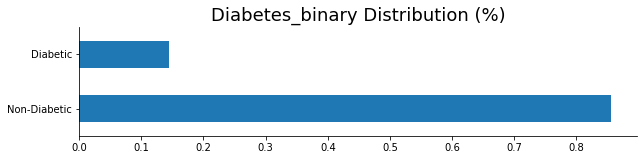

In [ ]:
df_test_shuffled['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

Now our data sets are ready for the use. Now we have to split the training set and the testing set.

In [ ]:
X_train = df1_ohe.drop(['Diabetes_binary'],axis=1)
X_train.shape

(253680, 123)

In [ ]:
Y_train = df1_ohe['Diabetes_binary']
Y_train.shape

(253680,)

In [ ]:
X_test = df2_ohe.drop(['Diabetes_binary'],axis=1)
X_test.shape

(41355, 123)

In [ ]:
Y_test = df2_ohe['Diabetes_binary']
Y_test.shape

(41355,)

We have to convert them to matrix.

In [ ]:
#X_train_m = X_train.to_numpy()
#X_train_m= X_train_m.astype('float64')
#X_train_m, X_train_m.shape

In [ ]:
#Y_train_m = Y_train.to_numpy()
#Y_train_m = Y_train_m.astype('float64')
#Y_train_m, Y_train_m.shape

In [ ]:
#X_test_m = X_test.to_numpy()
#X_test_m = X_test_m.astype('float64')
#X_test_m,X_test_m.shape

In [ ]:
#Y_test_m = Y_test.to_numpy()
#Y_test_m = Y_test_m.astype('float64')
#Y_test_m, Y_test_m.shape

##Training using ANN

We start by building a baseline NN, with 1 input, 1 hidden layer (512 neurons) and 1 output.

In [ ]:
import keras
from keras import models
from keras import layers

In [ ]:
#Model with no regulariser
inputs = keras.Input(shape=X_train.shape[1])
hidden_layer = keras.layers.Dense(512, activation="relu")(inputs)
output_layer = keras.layers.Dense(2, activation="softmax")(hidden_layer)
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 123)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               63488     
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 64,514
Trainable params: 64,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

##Training of the baseline model.

In [ ]:
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=20,batch_size=128)

Epoch 1/20
1982/1982 [==============================] - 11s 3ms/step - loss: 0.3241 - accuracy: 0.8625 - val_loss: 0.3273 - val_accuracy: 0.8564
Epoch 2/20
1982/1982 [==============================] - 7s 4ms/step - loss: 0.3173 - accuracy: 0.8648 - val_loss: 0.3214 - val_accuracy: 0.8606
Epoch 3/20
1982/1982 [==============================] - 9s 5ms/step - loss: 0.3150 - accuracy: 0.8653 - val_loss: 0.3196 - val_accuracy: 0.8621
Epoch 4/20
1982/1982 [==============================] - 7s 3ms/step - loss: 0.3135 - accuracy: 0.8658 - val_loss: 0.3175 - val_accuracy: 0.8630
Epoch 5/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8669 - val_loss: 0.3217 - val_accuracy: 0.8596
Epoch 6/20
1982/1982 [==============================] - 7s 3ms/step - loss: 0.3120 - accuracy: 0.8667 - val_loss: 0.3187 - val_accuracy: 0.8624
Epoch 7/20
1982/1982 [==============================] - 7s 3ms/step - loss: 0.3117 - accuracy: 0.8669 - val_loss: 0.3158 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test,Y_test)

1293/1293 [==============================] - 3s 2ms/step - loss: 0.3187 - accuracy: 0.8614


In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


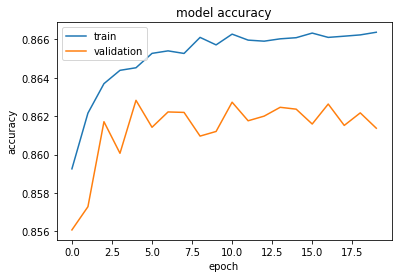

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig('ann_m1.png')

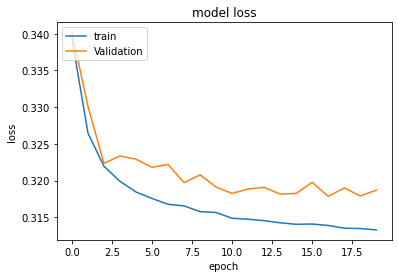

<Figure size 432x288 with 0 Axes>

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
plt.savefig('ann_l1.png')

## Adding Regularization On the baseline model

#### **L1 Regulirazation with 0.001 coefficient**

In [ ]:
hidden_layer1 = keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1(0.001))(inputs)
output_layer1 = keras.layers.Dense(2, activation="softmax")(hidden_layer1)
model1 = keras.Model(inputs=inputs, outputs=output_layer1)
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_2 (Dense)             (None, 512)               11264     
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
history1 = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=128)

Epoch 1/20
1982/1982 [==============================] - 7s 3ms/step - loss: 0.3132 - accuracy: 0.8667 - val_loss: 0.3182 - val_accuracy: 0.8622
Epoch 2/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3133 - accuracy: 0.8663 - val_loss: 0.3170 - val_accuracy: 0.8626
Epoch 3/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3130 - accuracy: 0.8665 - val_loss: 0.3175 - val_accuracy: 0.8619
Epoch 4/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3131 - accuracy: 0.8663 - val_loss: 0.3195 - val_accuracy: 0.8612
Epoch 5/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8662 - val_loss: 0.3181 - val_accuracy: 0.8619
Epoch 6/20
1982/1982 [==============================] - 7s 3ms/step - loss: 0.3127 - accuracy: 0.8667 - val_loss: 0.3195 - val_accuracy: 0.8607
Epoch 7/20
1982/1982 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8664 - val_loss: 0.3201 - val_accuracy:

In [ ]:
test_loss1, test_acc1 = model1.evaluate(X_test,Y_test)

1293/1293 [==============================] - 4s 3ms/step - loss: 1.5193 - accuracy: 0.1652


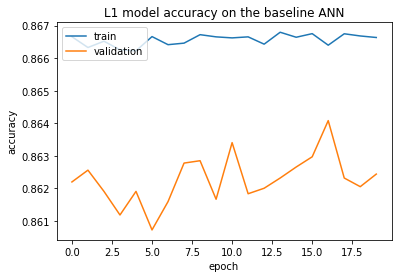

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('L1 model accuracy on the baseline ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

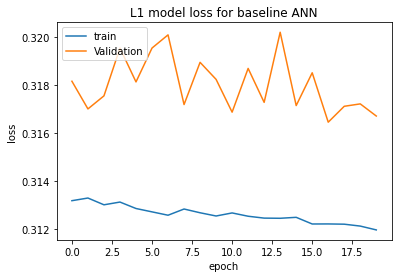

In [ ]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('L1 model loss for baseline ANN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

### **L2 Regularization on the baseline model with coefficient 0.001**

In [ ]:
hidden_layer2 = keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001))(inputs)
output_layer2 = keras.layers.Dense(2, activation="softmax")(hidden_layer2)
model2 = keras.Model(inputs=inputs, outputs=output_layer2)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_4 (Dense)             (None, 512)               11264     
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
history2 = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=129)

Epoch 1/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8666 - val_loss: 0.3183 - val_accuracy: 0.8614
Epoch 2/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3120 - accuracy: 0.8668 - val_loss: 0.3168 - val_accuracy: 0.8628
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3120 - accuracy: 0.8667 - val_loss: 0.3173 - val_accuracy: 0.8626
Epoch 4/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3118 - accuracy: 0.8668 - val_loss: 0.3175 - val_accuracy: 0.8620
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3119 - accuracy: 0.8668 - val_loss: 0.3174 - val_accuracy: 0.8618
Epoch 6/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3119 - accuracy: 0.8669 - val_loss: 0.3162 - val_accuracy: 0.8625
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3119 - accuracy: 0.8666 - val_loss: 0.3163 - val_accuracy:

In [ ]:
test_loss2, test_acc2 = model2.evaluate(X_test,Y_test)

1293/1293 [==============================] - 3s 2ms/step - loss: 0.8490 - accuracy: 0.4297


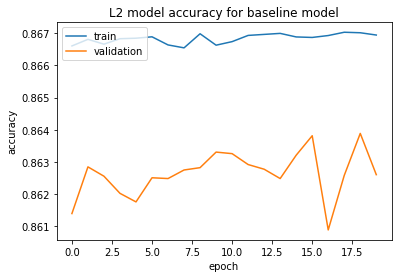

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('L2 model accuracy for baseline model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

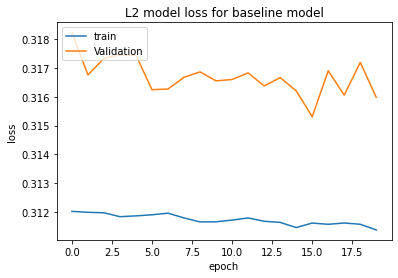

In [ ]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('L2 model loss for baseline model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

### **L1_L2 Regularization for baseline model with 0.01 coefficient**

In [ ]:
hidden_layer_l1_l2 = keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.01))(inputs)
output_layer_l1_l2 = keras.layers.Dense(2, activation="softmax")(hidden_layer_l1_l2)
modell1l2 = keras.Model(inputs=inputs, outputs=output_layer_l1_l2)
modell1l2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_6 (Dense)             (None, 512)               11264     
                                                                 
 dense_7 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 12,290
Trainable params: 12,290
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modell1l2.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [ ]:
historyl1l2 = modell1l2.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=129)

Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.5592 - accuracy: 0.8606 - val_loss: 0.3766 - val_accuracy: 0.8562
Epoch 2/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3583 - accuracy: 0.8630 - val_loss: 0.3577 - val_accuracy: 0.8591
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3494 - accuracy: 0.8637 - val_loss: 0.3583 - val_accuracy: 0.8584
Epoch 4/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3452 - accuracy: 0.8641 - val_loss: 0.3467 - val_accuracy: 0.8598
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3438 - accuracy: 0.8634 - val_loss: 0.3598 - val_accuracy: 0.8544
Epoch 6/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3427 - accuracy: 0.8636 - val_loss: 0.3461 - val_accuracy: 0.8589
Epoch 7/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3418 - accuracy: 0.8634 - val_loss: 0.3533 - val_accuracy:

In [ ]:
test_loss3, test_acc3 = modell1l2.evaluate(X_test,Y_test)

1293/1293 [==============================] - 3s 2ms/step - loss: 0.3448 - accuracy: 0.8588


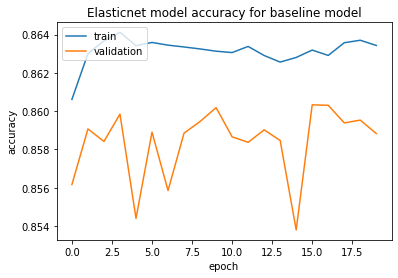

In [ ]:
# summarize history for accuracy
plt.plot(historyl1l2.history['accuracy'])
plt.plot(historyl1l2.history['val_accuracy'])
plt.title('Elasticnet model accuracy for baseline model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

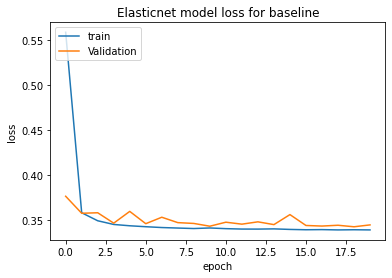

In [ ]:
# summarize history for loss
plt.plot(historyl1l2.history['loss'])
plt.plot(historyl1l2.history['val_loss'])
plt.title('Elasticnet model loss for baseline')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

## Accuracy of the prediction of each class

In [ ]:
Y_pred = modell1l2.predict(X_test)
prediction = pd.DataFrame(Y_pred)
prediction


1293/1293 [==============================] - 3s 2ms/step


0         1
0      0.779823  0.220177
1      0.746852  0.253148
2      0.973134  0.026866
3      0.892213  0.107787
4      0.989001  0.010999
...         ...       ...
41350  0.844723  0.155277
41351  0.937963  0.062037
41352  0.990156  0.009844
41353  0.991960  0.008040
41354  0.986862  0.013138

[41355 rows x 2 columns]

In [ ]:
#predicted_diabet_status = prediction.idxmax(axis="columns")

In [ ]:
#I transform the vector into a data set
#Y_test_data = pd.DataFrame(Y_test_m)

In [ ]:
#Confusion matrix
#from sklearn.metrics import confusion_matrix

#true_diabet_status = Y_test_data.idxmax(axis="columns")

#matrix = confusion_matrix(true_diabet_status, predicted_diabet_status)
#print(matrix)


## We now change the ANN by considering 02 hidden layers with different optimizers and different regularizers.

**This is the second baseline model with no regularizer.**

In [ ]:
def build_model(optimizer):
  inputs = keras.Input(shape=X_train.shape[1])
  hidden_layer1 = keras.layers.Dense(512, activation="relu")(inputs)
  hidden_layer2 = keras.layers.Dense(512, activation="relu")(hidden_layer1)
  output_layer = keras.layers.Dense(2, activation="sigmoid")(hidden_layer2)
  model = keras.Model(inputs=inputs, outputs=output_layer)
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,  metrics = ['accuracy'])
  return model


Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3373 - accuracy: 0.8606 - val_loss: 0.3273 - val_accuracy: 0.8585
Epoch 2/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3225 - accuracy: 0.8639 - val_loss: 0.3220 - val_accuracy: 0.8602
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3190 - accuracy: 0.8646 - val_loss: 0.3238 - val_accuracy: 0.8590
Epoch 4/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3175 - accuracy: 0.8649 - val_loss: 0.3228 - val_accuracy: 0.8612
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3166 - accuracy: 0.8653 - val_loss: 0.3206 - val_accuracy: 0.8605
Epoch 6/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3157 - accuracy: 0.8655 - val_loss: 0.3217 - val_accuracy: 0.8607
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3151 - accuracy: 0.8658 - val_loss: 0.3205 - val_accuracy:

Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3492 - accuracy: 0.8595 - val_loss: 0.3342 - val_accuracy: 0.8590
Epoch 2/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3243 - accuracy: 0.8635 - val_loss: 0.3257 - val_accuracy: 0.8599
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3213 - accuracy: 0.8646 - val_loss: 0.3234 - val_accuracy: 0.8610
Epoch 4/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3201 - accuracy: 0.8646 - val_loss: 0.3217 - val_accuracy: 0.8609
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3195 - accuracy: 0.8650 - val_loss: 0.3275 - val_accuracy: 0.8590
Epoch 6/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3188 - accuracy: 0.8648 - val_loss: 0.3207 - val_accuracy: 0.8613
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3182 - accuracy: 0.8650 - val_loss: 0.3405 - val_accuracy:

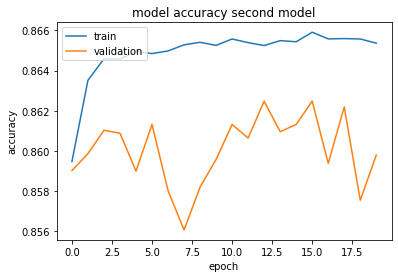

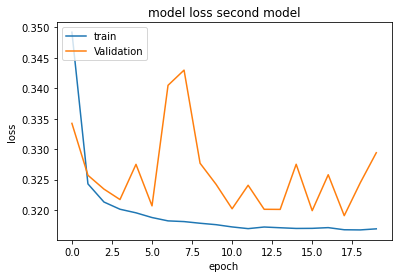

Epoch 1/20
1967/1967 [==============================] - 8s 4ms/step - loss: 0.3589 - accuracy: 0.8583 - val_loss: 0.3767 - val_accuracy: 0.8375
Epoch 2/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3359 - accuracy: 0.8616 - val_loss: 0.3329 - val_accuracy: 0.8584
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3309 - accuracy: 0.8629 - val_loss: 0.3333 - val_accuracy: 0.8578
Epoch 4/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3280 - accuracy: 0.8633 - val_loss: 0.3512 - val_accuracy: 0.8552
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3262 - accuracy: 0.8634 - val_loss: 0.3321 - val_accuracy: 0.8581
Epoch 6/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3242 - accuracy: 0.8641 - val_loss: 0.3267 - val_accuracy: 0.8604
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3235 - accuracy: 0.8642 - val_loss: 0.3268 - val_accuracy:

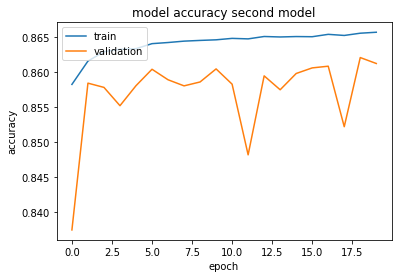

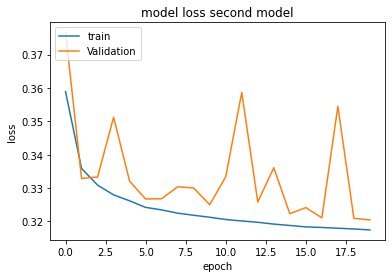

In [ ]:
optimizers = ['Adam', 'RMSprop', 'SGD']

for i in optimizers:

  model = build_model(i)


  hist=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=129)
  test_loss, test_acc = model.evaluate(X_test,Y_test)

  # summarize history for accuracy
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy second model')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss second model')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()


## **Adding Regularization - elastic net with coefficient 0.001**

In [ ]:
def build_model_reg(optimizer):
  inputs = keras.Input(shape=X_train.shape[1])
  hidden_layer1 = keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.001))(inputs)
  hidden_layer2 = keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(0.001))(hidden_layer1)
  output_layer = keras.layers.Dense(2, activation="sigmoid")(hidden_layer2)
  model_reg = keras.Model(inputs=inputs, outputs=output_layer)
  model_reg.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,  metrics = ['accuracy'])
  return model_reg

Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.8789 - accuracy: 0.8605 - val_loss: 0.3805 - val_accuracy: 0.8569
Epoch 2/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3660 - accuracy: 0.8639 - val_loss: 0.3721 - val_accuracy: 0.8598
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3628 - accuracy: 0.8650 - val_loss: 0.3766 - val_accuracy: 0.8580
Epoch 4/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3609 - accuracy: 0.8644 - val_loss: 0.3657 - val_accuracy: 0.8597
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3599 - accuracy: 0.8647 - val_loss: 0.3642 - val_accuracy: 0.8610
Epoch 6/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8652 - val_loss: 0.3700 - val_accuracy: 0.8601
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3581 - accuracy: 0.8649 - val_loss: 0.3628 - val_accuracy:

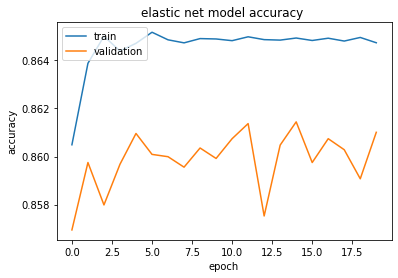

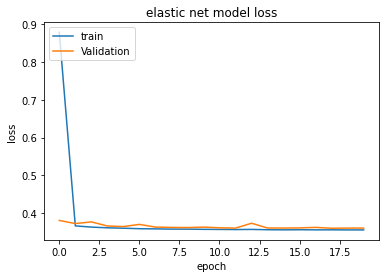

Epoch 1/20
1967/1967 [==============================] - 8s 4ms/step - loss: 0.7933 - accuracy: 0.8595 - val_loss: 0.4715 - val_accuracy: 0.8592
Epoch 2/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.4630 - accuracy: 0.8639 - val_loss: 0.4646 - val_accuracy: 0.8595
Epoch 3/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.4592 - accuracy: 0.8643 - val_loss: 0.4686 - val_accuracy: 0.8574
Epoch 4/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.4583 - accuracy: 0.8642 - val_loss: 0.4637 - val_accuracy: 0.8605
Epoch 5/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.4578 - accuracy: 0.8644 - val_loss: 0.4662 - val_accuracy: 0.8585
Epoch 6/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.4573 - accuracy: 0.8645 - val_loss: 0.4726 - val_accuracy: 0.8579
Epoch 7/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.4569 - accuracy: 0.8642 - val_loss: 0.4604 - val_accuracy:

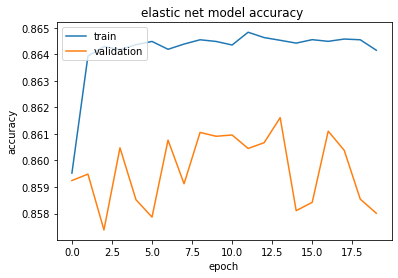

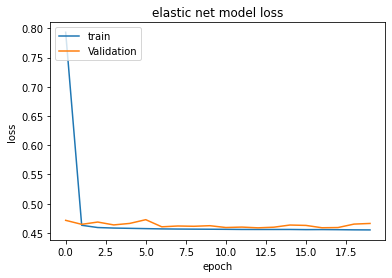

Epoch 1/20
1967/1967 [==============================] - 8s 4ms/step - loss: 9.6604 - accuracy: 0.8592 - val_loss: 4.6343 - val_accuracy: 0.8550
Epoch 2/20
1967/1967 [==============================] - 6s 3ms/step - loss: 2.1867 - accuracy: 0.8616 - val_loss: 0.6861 - val_accuracy: 0.8553
Epoch 3/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.4305 - accuracy: 0.8608 - val_loss: 0.3754 - val_accuracy: 0.8553
Epoch 4/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3611 - accuracy: 0.8612 - val_loss: 0.3598 - val_accuracy: 0.8563
Epoch 5/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3517 - accuracy: 0.8622 - val_loss: 0.3506 - val_accuracy: 0.8581
Epoch 6/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3476 - accuracy: 0.8627 - val_loss: 0.3590 - val_accuracy: 0.8555
Epoch 7/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3451 - accuracy: 0.8626 - val_loss: 0.3457 - val_accuracy:

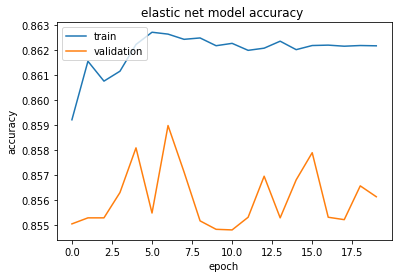

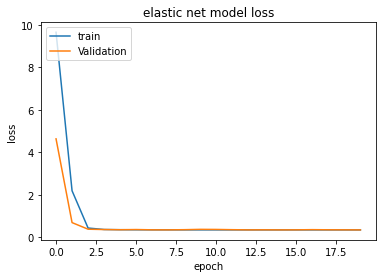

In [ ]:
optimizers = ['Adam', 'RMSprop', 'SGD']

for i in optimizers:

  model_reg = build_model_reg(i)


  hist_reg=model_reg.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=129)
  test_loss_reg, test_acc_reg = model_reg.evaluate(X_test,Y_test)

  # summarize history for accuracy
  plt.plot(hist_reg.history['accuracy'])
  plt.plot(hist_reg.history['val_accuracy'])
  plt.title('elastic net model accuracy ')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(hist_reg.history['loss'])
  plt.plot(hist_reg.history['val_loss'])
  plt.title('elastic net model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

## **Adding Regularization on the second model - Dropout**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
def build_model_drop(optimizer):
  classifier_drop = Sequential()
# Adding the input layer and the first hidden layer
  classifier_drop.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21))
  classifier_drop.add(Dropout(rate = 0.1))

# Adding the second hidden layer
  classifier_drop.add(Dense(units = 512, kernel_initializer = 'uniform', activation = 'relu'))
  classifier_drop.add(Dropout(rate = 0.1))

# Adding the output layer
  classifier_drop.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
  classifier_drop.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  
  return classifier_drop

Epoch 1/20
1967/1967 [==============================] - 8s 3ms/step - loss: 0.3332 - accuracy: 0.8622 - val_loss: 0.3261 - val_accuracy: 0.8582
Epoch 2/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3230 - accuracy: 0.8635 - val_loss: 0.3236 - val_accuracy: 0.8609
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3206 - accuracy: 0.8641 - val_loss: 0.3227 - val_accuracy: 0.8607
Epoch 4/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3192 - accuracy: 0.8645 - val_loss: 0.3239 - val_accuracy: 0.8599
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3185 - accuracy: 0.8644 - val_loss: 0.3249 - val_accuracy: 0.8578
Epoch 6/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3175 - accuracy: 0.8648 - val_loss: 0.3257 - val_accuracy: 0.8605
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3172 - accuracy: 0.8646 - val_loss: 0.3206 - val_accuracy:

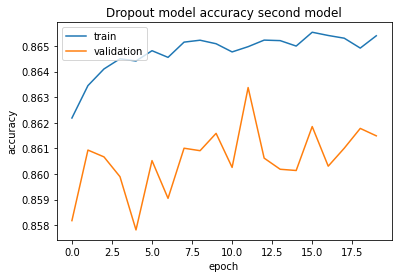

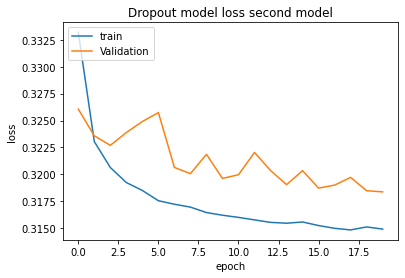

Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3351 - accuracy: 0.8619 - val_loss: 0.3280 - val_accuracy: 0.8573
Epoch 2/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3241 - accuracy: 0.8638 - val_loss: 0.3251 - val_accuracy: 0.8605
Epoch 3/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3222 - accuracy: 0.8642 - val_loss: 0.3266 - val_accuracy: 0.8599
Epoch 4/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3211 - accuracy: 0.8643 - val_loss: 0.3363 - val_accuracy: 0.8562
Epoch 5/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3203 - accuracy: 0.8645 - val_loss: 0.3262 - val_accuracy: 0.8610
Epoch 6/20
1967/1967 [==============================] - 7s 4ms/step - loss: 0.3203 - accuracy: 0.8646 - val_loss: 0.3225 - val_accuracy: 0.8602
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3197 - accuracy: 0.8646 - val_loss: 0.3207 - val_accuracy:

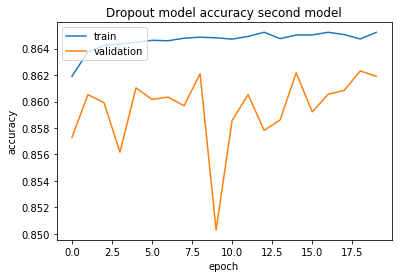

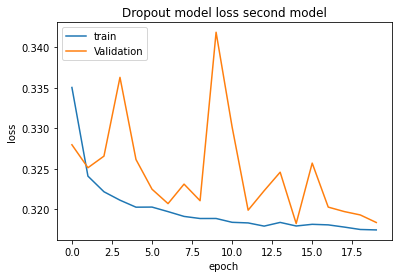

Epoch 1/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3633 - accuracy: 0.8606 - val_loss: 0.3590 - val_accuracy: 0.8550
Epoch 2/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3389 - accuracy: 0.8620 - val_loss: 0.3507 - val_accuracy: 0.8569
Epoch 3/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3324 - accuracy: 0.8625 - val_loss: 0.3333 - val_accuracy: 0.8585
Epoch 4/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3290 - accuracy: 0.8632 - val_loss: 0.3365 - val_accuracy: 0.8583
Epoch 5/20
1967/1967 [==============================] - 7s 3ms/step - loss: 0.3272 - accuracy: 0.8635 - val_loss: 0.3352 - val_accuracy: 0.8601
Epoch 6/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3257 - accuracy: 0.8634 - val_loss: 0.3275 - val_accuracy: 0.8593
Epoch 7/20
1967/1967 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.8637 - val_loss: 0.3435 - val_accuracy:

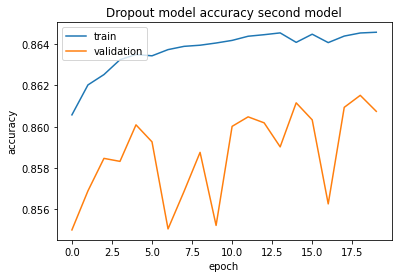

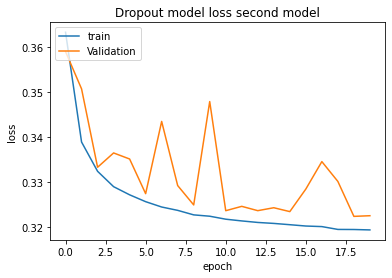

In [ ]:
for i in optimizers:

  model_drop = build_model_drop(i)


  hist=model_drop.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=10,batch_size=129)
  test_loss, test_acc = model_drop.evaluate(X_test,Y_test)

  # summarize history for accuracy
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Dropout model accuracy second model')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Dropout model loss second model')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'Validation'], loc='upper left')
  plt.show()

**Adding Regularization on the second model - Dropout and earlystopping with adam optimizer (learning rate 0.009)**

In [ ]:
from keras.optimizers import Adam
from keras import callbacks
from keras.callbacks import EarlyStopping

In [ ]:

 #Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model_mix = Sequential()

# layers

model_mix.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu', input_dim = 21)) #Notice the fact that we tune also the number of neurons per hidden layers
model_mix.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
model_mix.add(Dropout(0.25))
model_mix.add(Dense(units = 76, kernel_initializer = 'uniform', activation = 'relu'))
model_mix.add(Dropout(0.5))
model_mix.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.009)
model_mix.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:

# Train the ANN
history_mix = model_mix.fit(X_train, Y_train,validation_split=0.2, epochs = 10, batch_size = 129, callbacks=[early_stopping])

Epoch 1/10
1574/1574 [==============================] - 6s 4ms/step - loss: 0.3409 - accuracy: 0.8613 - val_loss: 0.3291 - val_accuracy: 0.8585
Epoch 2/10
1574/1574 [==============================] - 5s 3ms/step - loss: 0.3315 - accuracy: 0.8622 - val_loss: 0.3362 - val_accuracy: 0.8587
Epoch 3/10
1574/1574 [==============================] - 5s 3ms/step - loss: 0.3299 - accuracy: 0.8620 - val_loss: 0.3287 - val_accuracy: 0.8586
Epoch 4/10
1574/1574 [==============================] - 6s 4ms/step - loss: 0.3304 - accuracy: 0.8620 - val_loss: 0.3226 - val_accuracy: 0.8588
Epoch 5/10
1574/1574 [==============================] - 5s 3ms/step - loss: 0.3294 - accuracy: 0.8625 - val_loss: 0.3295 - val_accuracy: 0.8602
Epoch 6/10
1574/1574 [==============================] - 5s 3ms/step - loss: 0.3290 - accuracy: 0.8623 - val_loss: 0.3213 - val_accuracy: 0.8600
Epoch 7/10
1574/1574 [==============================] - 5s 3ms/step - loss: 0.3288 - accuracy: 0.8624 - val_loss: 0.3238 - val_accuracy:

In [ ]:
 test_loss, test_acc = model_mix.evaluate(X_test,Y_test)

1293/1293 [==============================] - 4s 3ms/step - loss: 0.3310 - accuracy: 0.8548


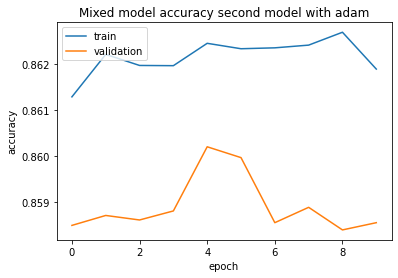

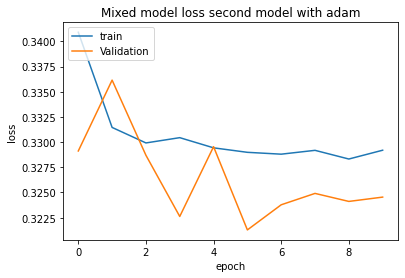

In [ ]:
# summarize histo# summarize histo
# summarize histo

￼Group Assignment final work.ipynb_Notebook unstarred
File
Edit
View
Insert
Runtime
Tools
Help
Last saved at 4:32 PM
Comment
Share
￼
ry for accuracy
plt.plot(history_mix.history['accuracy'])
plt.plot(history_mix.history['val_accuracy'])
plt.title('Mixed model accuracy second model with adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

  # summarize history for loss
plt.plot(history_mix.history['loss'])
plt.plot(history_mix.history['val_loss'])
plt.title('Mixed model loss second model with adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

We achieved the best model with this last one.